## Task 1: Exploratory Data Analysis (EDA) of Financial News

This notebook performs Task 1 of the project:
- Descriptive statistics of news headlines
- Text preprocessing and cleaning
- Time series analysis of news publication
- Publisher analysis


In [ ]:
import sys
from pathlib import Path


# Add project root and src/ folder to Python path
project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

print("Project root:", project_root)
print("SRC path:", src_path)

Project root: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment
SRC path: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\src


### Imports


In [26]:
# =====================================================
# Cell 1: Imports & Logger
# =====================================================
from pathlib import Path
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fns_project.data.news_pipeline import (
    NewsLoader,
    NewsPreprocessor,
    NewsAggregator,
    NewsAnalysisService,
)

from fns_project.data.preprocess import add_headline_metrics
from fns_project.config import RAW_DIR
from src.fns_project.analysis.eda import (
    headline_length_stats,
    count_articles_per_publisher,
    publication_trend_by_date,
    publication_trend_by_time,
    extract_top_keywords,
    extract_publisher_domains
)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(levelname)s %(message)s")
logger = logging.getLogger(__name__)

In [20]:
# Cell 3 — Instantiate loader + preprocessor (no aligner; Task 1 doesn't require price data)
NEWS_FILE = RAW_DIR / "news/raw_analyst_ratings.csv"  # use RAW_DIR from config
loader = NewsLoader(path=NEWS_FILE, date_col="date", tz="Etc/GMT+4")

# Preprocessor
preprocessor = NewsPreprocessor(
    text_col="headline",
    remove_stopwords=True,
    lemmatize=True  # optional: enable lemmatization
)

# Service without aligner or aggregator
service = NewsAnalysisService(
    loader=loader,
    preprocessor=preprocessor,
    aligner=None,
    aggregator=None
)

print("News file being used:", NEWS_FILE)

News file being used: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\raw\news\raw_analyst_ratings.csv


In [11]:
# ================================================
# Run preprocessing pipeline
# ================================================

df_news = service.run_pipeline(preprocess=True, align=False, aggregate=False)
print("Processed News DataFrame:")
display(df_news.head())

2025-11-23 15:30:16,211 INFO Loaded news: 55987 rows from D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\raw\news\raw_analyst_ratings.csv
2025-11-23 15:30:27,965 INFO Preprocessed headlines: 55987 -> 55987 rows


Processed News DataFrame:


,Unnamed: 0,headline,url,publisher,date,stock
0,357064,etf watch april 28 2011 dgp ieo prn idx,https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP
1,437774,new regional emerging market etf,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR
2,350150,dejour extends credit facility october 31st fa...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ
3,49280,etf showdown crouching tiger hidden etf,https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA
4,539428,gdl fund redeem outstanding 8 50 series cumula...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL


In [21]:
# ================================================
# Cell 5 — Add headline metrics for EDA
# ================================================
df_news_metrics = add_headline_metrics(df_news, text_col="headline")
display(df_news_metrics.head())

2025-11-23 15:41:41,571 INFO Added headline metrics to DataFrame (rows=55987)


,Unnamed: 0,headline,url,publisher,date,stock,headline_len_chars,headline_word_count,headline_char_per_word
0,357064,etf watch april 28 2011 dgp ieo prn idx,https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP,39,9,4.333333
1,437774,new regional emerging market etf,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR,32,5,6.400000
2,350150,dejour extends credit facility october 31st fa...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ,64,11,5.818182
3,49280,etf showdown crouching tiger hidden etf,https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA,39,6,6.500000
4,539428,gdl fund redeem outstanding 8 50 series cumula...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL,75,11,6.818182


In [22]:
# Headline length and word count stats
stats = headline_length_stats(df_news_metrics)
print("Descriptive stats for headlines:")
print(stats)

2025-11-23 15:42:14,520 INFO Computed headline length statistics.


Descriptive stats for headlines:
       headline_len_chars  headline_word_count
count        55987.000000         55987.000000
mean            65.600175            10.513119
std             43.919715             6.068579
min              3.000000             1.000000
25%             34.000000             6.000000
50%             53.000000             9.000000
75%             78.000000            13.000000
max            419.000000            62.000000


Top publishers by article count:
           publisher  article_count
0  Benzinga Newsdesk          14750
1         Lisa Levin          12408
2      ETF Professor           4362
3      Paul Quintaro           4212
4  Benzinga Newsdesk           3177
5  Benzinga Insights           2332
6         Vick Meyer           2128
7      Charles Gross           1790
8         Hal Lindon           1470
9  Benzinga_Newsdesk           1239


C:\Users\user\AppData\Local\Temp\ipykernel_19520\4003890689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="article_count", y="publisher",


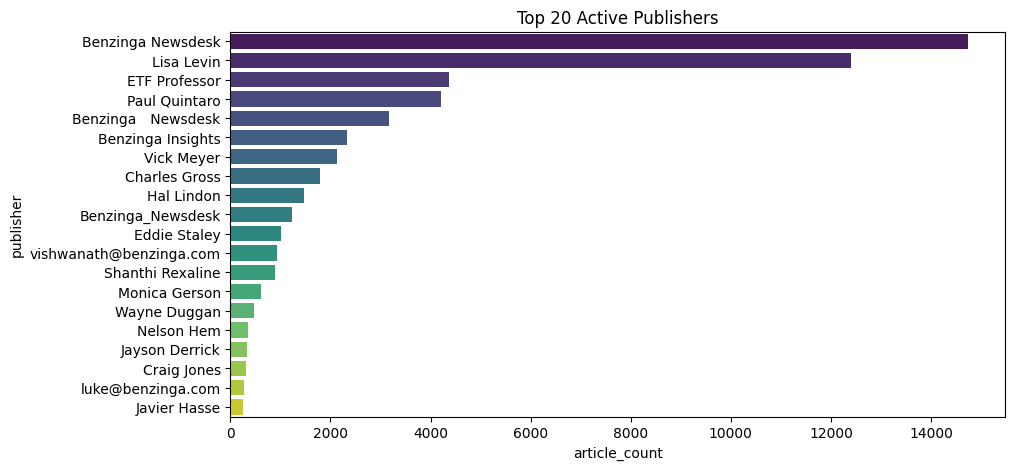

In [27]:
publisher_counts = count_articles_per_publisher(
    df_news_metrics, col="publisher")
print("Top publishers by article count:")
print(publisher_counts.head(10))

# Optional bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="article_count", y="publisher",
            data=publisher_counts.head(20), palette="viridis")
plt.title("Top 20 Active Publishers")
plt.show()

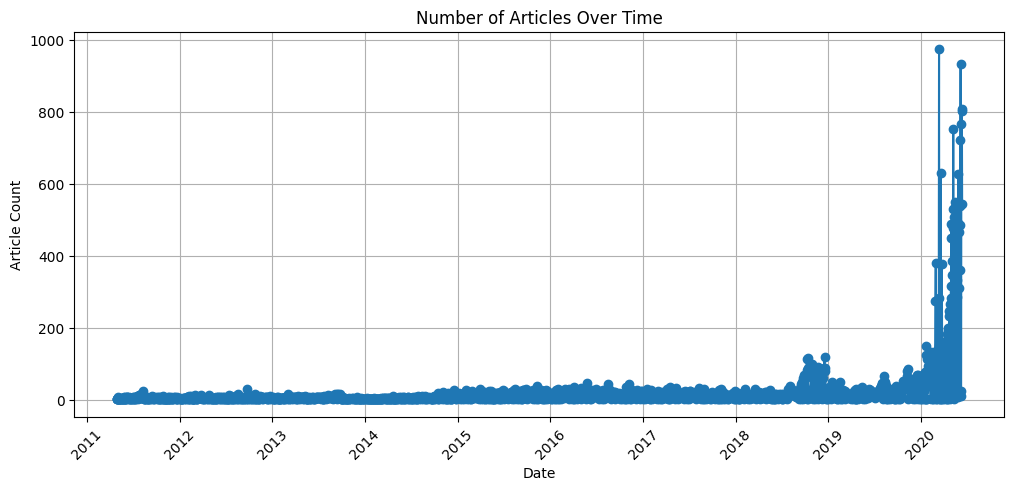

In [32]:
# Use the same column name that the function returns
trend_by_date = publication_trend_by_date(
    df_news_metrics, date_col='date_naive')

# The returned column name will match date_col; rename for convenience
trend_by_date = trend_by_date.rename(columns={'date_naive': 'date'})

plt.figure(figsize=(12, 5))
plt.plot(trend_by_date["date"], trend_by_date["article_count"], marker='o')
plt.title("Number of Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

2025-11-23 15:51:35,013 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\user\AppData\Local\Temp\ipykernel_19520\1642552162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="article_count",
2025-11-23 15:51:35,044 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


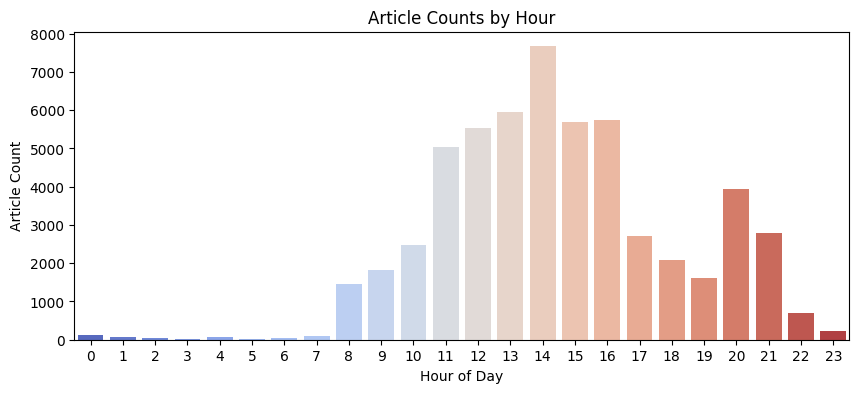

In [36]:
trend_by_hour = publication_trend_by_time(
    df_news_metrics, date_col='date_naive')

plt.figure(figsize=(10, 4))
sns.barplot(x="hour", y="article_count",
            data=trend_by_hour, palette="coolwarm")
plt.title("Article Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Article Count")
plt.show()

Top 20 keywords in headlines:
      keyword  count
0       stock  14108
1       share   9926
2        week   9092
3          52   8453
4      market   6648
5     trading   6575
6     company   6031
7         hit   5929
8         low   5690
9       price   5575
10        eps   5531
11     target   4695
12       sale   4624
13        etf   4511
14      lower   4506
15     higher   4271
16   estimate   4090
17    session   3486
18     report   3395
19  maintains   3266


C:\Users\user\AppData\Local\Temp\ipykernel_19520\2893822792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="keyword", data=top_keywords, palette="magma")


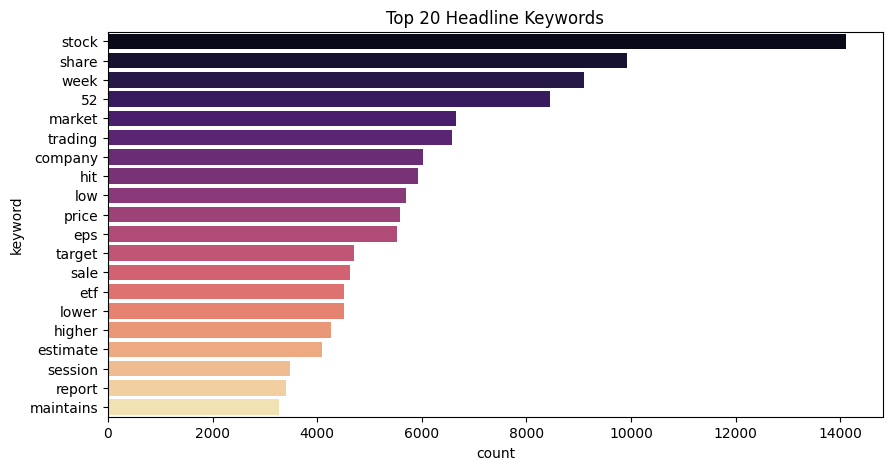

In [37]:
top_keywords = extract_top_keywords(
    df_news_metrics, text_col="headline", top_n=20, max_features=2000, min_df=3)
print("Top 20 keywords in headlines:")
print(top_keywords)

plt.figure(figsize=(10, 5))
sns.barplot(x="count", y="keyword", data=top_keywords, palette="magma")
plt.title("Top 20 Headline Keywords")
plt.show()

Top publisher domains:
         domain  count
0  benzinga.com   1196
1     gmail.com      3


C:\Users\user\AppData\Local\Temp\ipykernel_19520\4165079215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="domain", data=domains.head(15), palette="cubehelix")


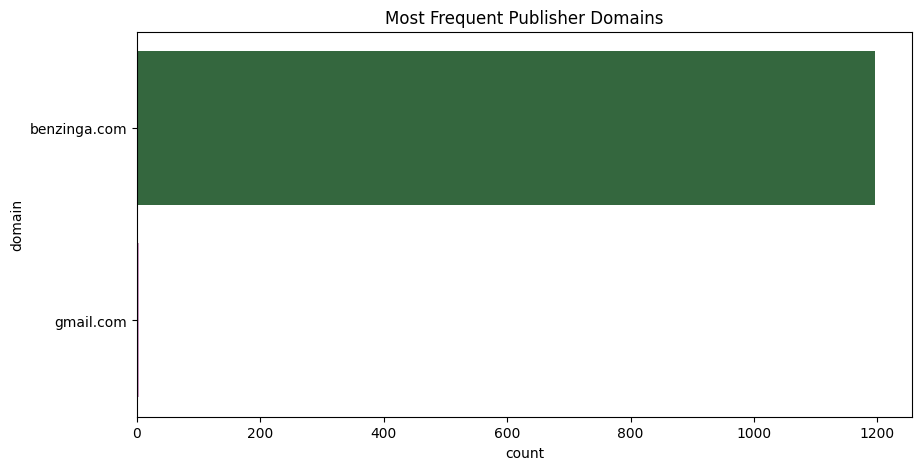

In [35]:
domains = extract_publisher_domains(df_news_metrics, col="publisher")
print("Top publisher domains:")
print(domains.head(10))

plt.figure(figsize=(10, 5))
sns.barplot(x="count", y="domain", data=domains.head(15), palette="cubehelix")
plt.title("Most Frequent Publisher Domains")
plt.show()